# **DIFFERENTIAL EQUATIONS WITH PYTHON**
                        
                     Dr. GHULAM MURTAZA
### **Contents**

*   Solving differential equations using Sympy
*   Solving differential equation using Laplace tarnsformation 
*   Initial value problems using scipy

*   Boundary Value problems using scipy










### **Solving differential equations using Sympy**
We start with a very simple example:
$$y''+2y'+y=0$$


In [ ]:
from sympy import *       #symbols, Function,Eq, dsolve,checkodesol,sin,pi,laplace_transform,inverse_laplace_transform,lambdify
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
x = symbols('x')
y = Function('y')(x)
yp = y.diff(x)
ypp = yp.diff(x) # or ypp = y.diff((x, 2))
yppp = ypp.diff(x)

In [ ]:

eq = ypp + 2*yp + y
solution=dsolve(eq, y)
print("solution:",solution)
solution


solution: Eq(y(x), (C1 + C2*x)*exp(-x))


Eq(y(x), (C1 + C2*x)*exp(-x))

In [ ]:
eq1=Eq(ypp + 2*yp + y,0)
solution1=dsolve(eq1, y)
print("solution1:",solution1)


solution1: Eq(y(x), (C1 + C2*x)*exp(-x))


In [ ]:
print("right hand side of solution:",solution.lhs)
print("left hand side of solution:",solution.rhs)
#solution.rhs

right hand side of solution: y(x)
left hand side of solution: (C1 + C2*x)*exp(-x)


In [ ]:
checkodesol(eq,solution)

(True, 0)

Now we take a nonhomegenous equation:
$$y''+2y'+y=sin(2x)$$

In [ ]:
eq1=Eq(ypp + 2*yp + y,sin(2*x))
solution=dsolve(eq1, y)
solution


Eq(y(x), (C1 + C2*x)*exp(-x) - 3*sin(2*x)/25 - 4*cos(2*x)/25)

In [ ]:
checkodesol(eq1,solution)

(True, 0)

Another example:
$$y''-4y=12x$$

In [ ]:
eq=Eq(ypp -4*y,12*x)
solution=dsolve(eq, y)
solution

Eq(y(x), C1*exp(-2*x) + C2*exp(2*x) - 3*x)

In [ ]:
#classify_ode(eq, y)
#dsolve(eq, y, hint="all")
from sympy.solvers import ode
ode.allhints

('factorable',
 'nth_algebraic',
 'separable',
 '1st_exact',
 '1st_linear',
 'Bernoulli',
 'Riccati_special_minus2',
 '1st_homogeneous_coeff_best',
 '1st_homogeneous_coeff_subs_indep_div_dep',
 '1st_homogeneous_coeff_subs_dep_div_indep',
 'almost_linear',
 'linear_coefficients',
 'separable_reduced',
 '1st_power_series',
 'lie_group',
 'nth_linear_constant_coeff_homogeneous',
 'nth_linear_euler_eq_homogeneous',
 'nth_linear_constant_coeff_undetermined_coefficients',
 'nth_linear_euler_eq_nonhomogeneous_undetermined_coefficients',
 'nth_linear_constant_coeff_variation_of_parameters',
 'nth_linear_euler_eq_nonhomogeneous_variation_of_parameters',
 'Liouville',
 '2nd_linear_airy',
 '2nd_linear_bessel',
 '2nd_hypergeometric',
 '2nd_hypergeometric_Integral',
 'nth_order_reducible',
 '2nd_power_series_ordinary',
 '2nd_power_series_regular',
 'nth_algebraic_Integral',
 'separable_Integral',
 '1st_exact_Integral',
 '1st_linear_Integral',
 'Bernoulli_Integral',
 '1st_homogeneous_coeff_subs_inde

**Keyword arguments: hint** "is the solving method that you want dsolve to use."


 For example, if you know that given differential equation is a separable equation, you can use keyword `hint='separable'` to force dsolve to resolve it as a separable equation: For this, see the following example
 $$\frac{dx}{dy}+2xy^2=0$$

In [ ]:
dsolve(yp+2*x*y**2,y, hint='separable')

Eq(y(x), 1/(C1 + x**2))

In [ ]:
dsolve(Eq(ypp -2*yp+5*y,exp(x)*tan(2*x)),y)

Eq(y(x), (C2*sin(2*x) + (C1 + log(sin(2*x) - 1)/8 - log(sin(2*x) + 1)/8)*cos(2*x))*exp(x))

**Initial value problem:** An initial value problem (IVP) is a differential equation with a set of constraints at the initial point.$$\frac{d^{n}y}{dx^{n}}=f(x,y,y^{\prime },\cdots ,y^{(n-1)})$$ $$y(x_{0})=y_{0},y(x_{0})=y_{1},\cdots ,y^{(n-1)}(x_{0})=y_{n-1}.$$
Example:$$y''-4y=12t, y(0)=4, y'(0)=1$$

In [ ]:
solution=dsolve(eq, y,ics={y.subs(x,0):4,yp.subs(x,0):1})
print("solution:",solution.rhs)
solution


solution: -3*x + 3*exp(2*x) + exp(-2*x)


Eq(y(x), -3*x + 3*exp(2*x) + exp(-2*x))

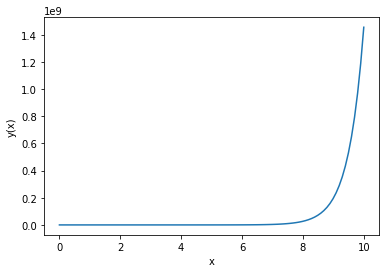

In [ ]:
sol_func=lambdify(x,solution.rhs,'numpy')
x_span = np.linspace(0, 10, 100)
y_span=sol_func(x_span)
plt.plot(x_span,y_span) 
plt.xlabel('x') 
plt.ylabel('y(x)') 
plt.show()

**Boundary Value problem:**
Example:$$y''+y=x^2+1, y(0)= 5, y(1)=0$$

In [ ]:
eq=Eq(ypp +y,x**2+1)
solution=dsolve(eq, y,ics={y.subs(x,0):5,y.subs(x,1):0})
solution



Eq(y(x), x**2 - 6*sin(x)*cos(1)/sin(1) + 6*cos(x) - 1)

**Coupled system:** Mixing of fluid in two tanks
\begin{eqnarray*}
\frac{dx_1}{dt} &=&-\frac{2}{25}x_1+\frac{1}{50}x_2 \\
\frac{dx_2}{dt} &=&\frac{2}{25}x_1-\frac{2}{25}x_2\\ 
x_1(0) &=&25,x_2(0) =0
\end{eqnarray*}

In [ ]:


t = symbols('t')
x1 =Function('x1')(t)
x2=Function('x2')(t)

x1p = x1.diff(t)
x2p = x2.diff(t)

eqs=[Eq(x1p,(-2/25)*x1+(1/50)*x2),Eq(x2p,(2/25)*x1-(2/25)*x2)]
solution=dsolve(eqs,[x1,x2],ics={x1.subs(t,0):25,x2.subs(t,0):0})
solution[0]


Eq(x1(t), 12.5*exp(-0.12*t) + 12.5*exp(-0.04*t))

In [ ]:
solution[1]

Eq(x2(t), -25.0*exp(-0.12*t) + 25.0*exp(-0.04*t))

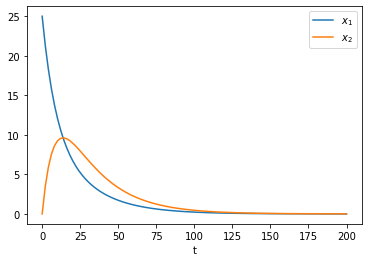

In [ ]:
t_span = np.linspace(0, 200, 100)

sol_func=lambdify(t,[solution[0].rhs,solution[1].rhs],'numpy')
y_span=sol_func(t_span)

plt.plot(t_span,y_span[0],t_span,y_span[1]) 
plt.xlabel('t') 
plt.legend(["$x_1$", "$x_2$"])
plt.show()

A differential equation which is not solvable with dsolve:
$$y'''-y^2=0$$

In [ ]:
eq=Eq(yppp-y**2,0)
#dsolve(eq, y)
classify_ode(eq, y)

()

### **Solving differential equation using Laplace tarnsformation**
Consider the following problem:
$$y''+ 5y'+ 4y= 0, y(0)= 1, y'(0)= 0$$


In [ ]:
from sympy import *
symbolsToDelete = (t,y)
t = symbols('t',real=true,positive=true)
s = symbols('s')
y = Function('y')(t)
Y = laplace_transform(y, t, s,noconds=true)
def LT(y):
    return laplace_transform(y, t, s,noconds=true)
def ILT(Y):
    return inverse_laplace_transform(Y, s, t)


lap_eq=Eq(s**2*LT(y)-s*(1)-0+5*s*LT(y)-5+4*LT(y),0)

Inv_eq=ILT(solve(lap_eq,Y)[0])
Inv_eq



(4*exp(3*t) - 1)*exp(-4*t)/3

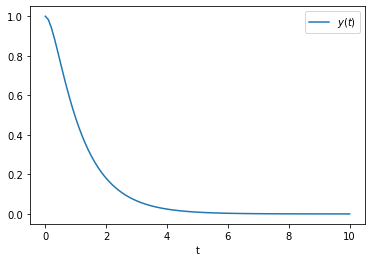

In [ ]:
sol_func=lambdify(t,ILT(solve(lap_eq,Y)[0]),'numpy')
t_span = np.linspace(0, 10, 100)
y_span=sol_func(t_span)

plt.plot(t_span,y_span) 
plt.xlabel('t') 
plt.legend(["$y(t)$"])
plt.show()

In [ ]:
y.subs(t,0):1

### **Initial value problems using scipy** 
 We start with a very basic problem: Exponential decay
\begin{eqnarray*}
\frac{dy}{dx} &=&ky \\
y(x_{0}) &=&y_{0},
\end{eqnarray*} where $k$ is a negative number.





**Example**
\begin{eqnarray*}
\frac{dy}{dx} &=&-0.5y \\
y(0) &=&2,
\end{eqnarray*}

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt 

In [ ]:

def exponential_decay(t, y): 
    return -0.5 * y 
sol = solve_ivp(exponential_decay, (0,10),[2])
print(sol.t)
print(sol.y)

t_span=(0,10)
y0=[2]
sol1 = solve_ivp(exponential_decay,t_span,y0,dense_output=True)


[ 0.          0.11488132  1.26369452  3.06074656  4.81637262  6.57504937
  8.33467262 10.        ]
[[2.         1.88835583 1.0632438  0.43316531 0.18014905 0.07480841
  0.03105019 0.01350782]]


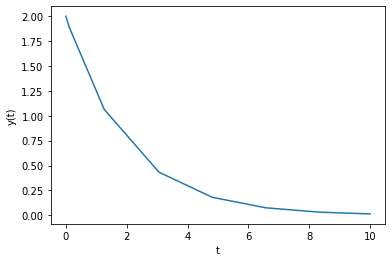

In [ ]:
plt.plot(sol1.t,sol1.y[0]) 
plt.xlabel('t') 
plt.ylabel('y(t)') 
plt.show()

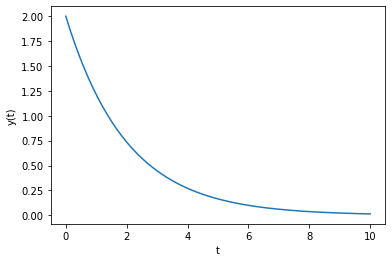

In [ ]:
t_eval = np.linspace(0, 10, 200)
z = sol1.sol(t_eval)
plt.plot(t_eval,z[0]) 
plt.xlabel('t') 
plt.ylabel('y(t)') 
plt.show()

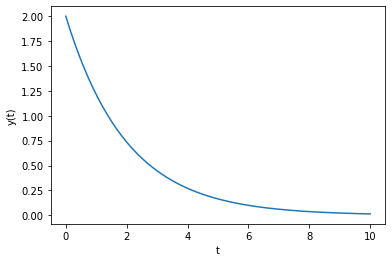

In [ ]:
t_span=(0,10)
t_eval = np.linspace(0, 10, 200)
y0=[2]
sol = solve_ivp(exponential_decay,t_span,y0,t_eval=t_eval)
plt.plot(sol.t,sol.y[0]) 
plt.xlabel('t') 
plt.ylabel('y(t)') 
plt.show()

**Example** A second oder ivp 
\begin{eqnarray*}
y''+y &=&sin(x) \\
y(0) &=&\pi/2\\
y'(0) &=&\pi\\x\in[0,5]
\end{eqnarray*}
can be written alternatively as follows
\begin{eqnarray*}
z^{'}+y &=&sin(x)\\
\end{eqnarray*}
where
\begin{eqnarray*}
z&=&y'\\
y(0) &=&\pi/2\\
z(0) &=&\pi
\end{eqnarray*}
Now our problem becomes like this
$$%
\begin{bmatrix}
y \\ 
z%
\end{bmatrix}%
^{\prime }=%
\begin{bmatrix}
z \\ 
\sin x-y%
\end{bmatrix}%
$$
with initial condition
$$%
\begin{bmatrix}
y(0) \\ 
z(0)%
\end{bmatrix}%
=%
\begin{bmatrix}
\pi/2 \\ 
\pi%
\end{bmatrix}%
$$


In [ ]:
def ode_function(t, y):
    return np.array([y[1],np.sin(t)-y[0]])

t_span = (0,50)
t_eval = np.linspace(0, 50, 200)
y0 = np.array([np.pi /2, np.pi])
sol = solve_ivp(ode_function,t_span,y0,t_eval=t_eval)
sol.y[0]

array([  1.57079633,   2.30544246,   2.91110192,   3.36327465,
         3.64669595,   3.75482709,   3.68645689,   3.44787036,
         3.05411   ,   2.52596135,   1.88714435,   1.1660144 ,
         0.39493283,  -0.39304781,  -1.16399855,  -1.88483169,
        -2.52392423,  -3.05333442,  -3.44693113,  -3.68438247,
        -3.75281171,  -3.64657478,  -3.36389419,  -2.91116019,
        -2.30506927,  -1.57128965,  -0.73922353,   0.15521601,
         1.0704797 ,   1.96086216,   2.78098362,   3.48504596,
         4.03239188,   4.38844069,   4.5267745 ,   4.42752059,
         4.08530822,   3.51025774,   2.72419664,   1.75896141,
         0.65918405,  -0.51826513,  -1.71111462,  -2.85239179,
        -3.87598205,  -4.71868095,  -5.32570746,  -5.65020149,
        -5.6607758 ,  -5.34614236,  -4.71354514,  -3.78482163,
        -2.60107674,  -1.22396714,   0.27156806,   1.80226267,
         3.27967441,   4.61384696,   5.72025315,   6.52324333,
         6.9629796 ,   7.00255701,   6.62823339,   5.84

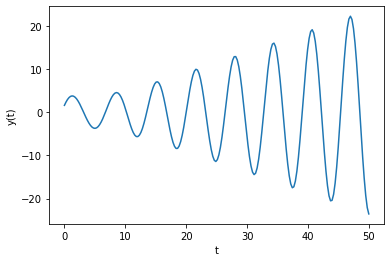

In [ ]:
plt.plot(sol.t,sol.y[0])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

### **Boundary value problems** 
A boundary value problem (BVP) is a differential equation with a set of constraints at the boundary points. For a second oder differential equation $$\frac{d^{2}y}{dx^{2}}=f(x,y,y^{\prime }), x\in[a,b]$$ 
any of the following conditions can be used for boundary conditions:
\begin{eqnarray}
y(a) &=& y_0,y(b) &=& y_1 \\
y'(a) &=& y_0,y'(b) &=& y_1 \\
y'(a) &=& y_0,y(b) &=& y_1 \\
y(a) &=& y_0,y'(b) &=& y_1 
\end{eqnarray} 

**Example:**
$y'' + y = cos(t); y'(0) = 5; y(\pi) = -5/3$


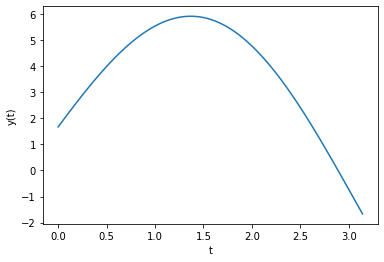

In [ ]:
from scipy.integrate import solve_bvp
import numpy as np
import matplotlib.pyplot as plt

def ode(t,y):
    return np.array([y[1], np.cos(t) - y[0]])

def bc(ya,yb):

# ya are the initial values
# yb are the final values
# each entry of the return array will be set to zero
    return np.array([ya[1] - 5, yb[0] + 5/3])

t_steps = 100
t = np.linspace(0,np.pi,t_steps)

# element 4: the initial guess.
y0 = np.zeros((2,t_steps))

# Solve the system.
sol = solve_bvp(ode, bc, t, y0)

# here we plot sol.x instead of sol.t
plt.plot(sol.x, sol.y[0])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()